# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

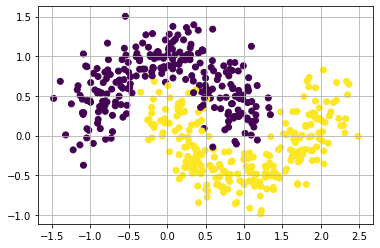

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)
# Добавим сетку и plt.show(), чтобы убрать строчку в выводе:)
plt.grid()
plt.show()

In [20]:
import warnings
warnings.filterwarnings('ignore')

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [3]:
# Разобьем данные на test и train части
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.5)
print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (250, 2) (250,)
Test:  (250, 2) (250,)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(penalty='l2', C=15, tol=1e-3) # add some params
svm = SVC(kernel='linear') # here too

In [5]:
# Реализуем функцию plot_decisions для дальнейшего использования:
def plot_decisions(data, estimator, title):
  y_pred = estimator.predict(X_test)
  print('Accuracy score for {} is'.format(title), accuracy_score(y_test, y_pred))
  plt.figure(figsize=(10, 8))
  plt.scatter(data[:, 0], data[:, 1], c=y_pred)
  plt.title('Predicted by {} classes'.format(title))
  plt.grid()
  plt.show()

Accuracy score for logistic regression is 0.848


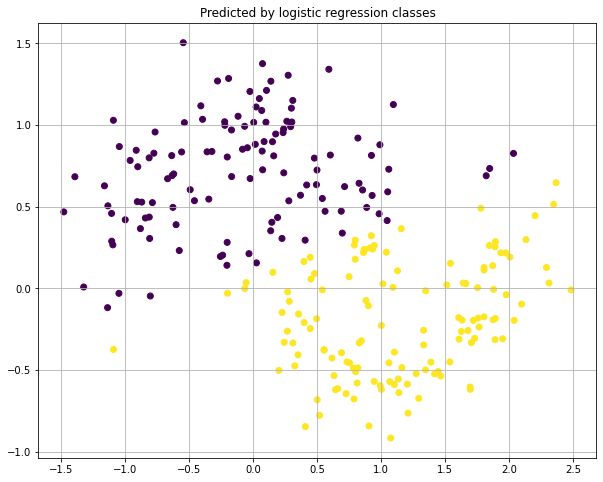

In [6]:
# Для логистической регрессии
lr.fit(X_train, y_train)
plot_decisions(X_test, lr, "logistic regression")

Accuracy score for SVM is 0.844


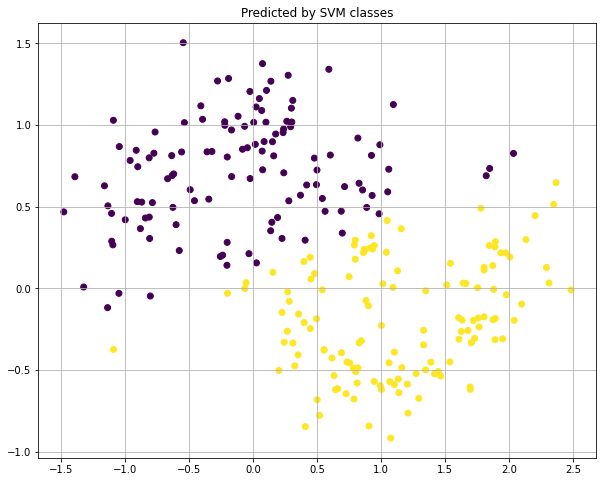

In [7]:
# Для SVM
svm.fit(X_train, y_train)
plot_decisions(X_test, svm, 'SVM')

__Вывод__: несмотря на то, что accuracy score достаточно высок, получили не очень хороший результат - четко видим прямую, которая разделяет наши классы, что не соответствует действительности, поэтому линейный подход не позволит нам получить нужный результат.

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [8]:
# poly
degrees = [2, 3, 4, 5, 6, 7]
for degree in degrees:
  svm = SVC(kernel='poly', degree=degree)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  print('Accuracy score for poly kernel (degree = {}): '.format(degree), 
        accuracy_score(y_test, y_pred))

# rbf
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Accuracy score for rbf kernel: ', accuracy_score(y_test, y_pred))

# sigmoid
svm = SVC(kernel='sigmoid')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Accuracy score for sigmoid kernel: ', accuracy_score(y_test, y_pred))

Accuracy score for poly kernel (degree = 2):  0.748
Accuracy score for poly kernel (degree = 3):  0.888
Accuracy score for poly kernel (degree = 4):  0.696
Accuracy score for poly kernel (degree = 5):  0.884
Accuracy score for poly kernel (degree = 6):  0.712
Accuracy score for poly kernel (degree = 7):  0.828
Accuracy score for rbf kernel:  0.964
Accuracy score for sigmoid kernel:  0.624


Видим, что наилучшего результата при полиномиальном подходе удается достичь при degree = 3. Построим графики для трех подходов, poly с degree = 3, rbf и sigmoid

Accuracy score for SVM (poly, degree = 3) is 0.888


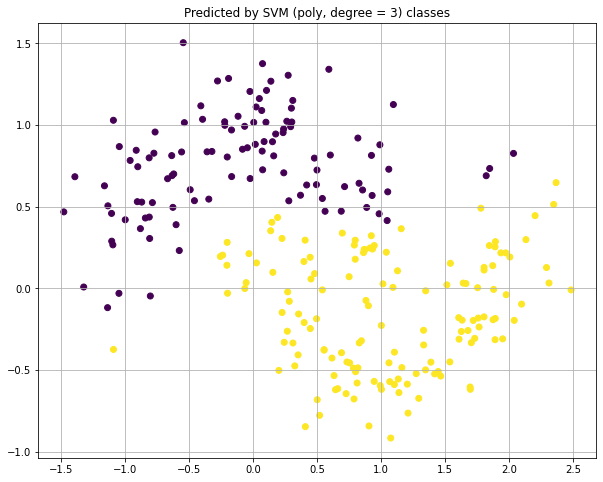

In [9]:
svm = SVC(kernel='poly', degree=3)
svm.fit(X_train, y_train)
plot_decisions(X_test, svm, 'SVM (poly, degree = 3)')

Accuracy score for SVM (rbf) is 0.964


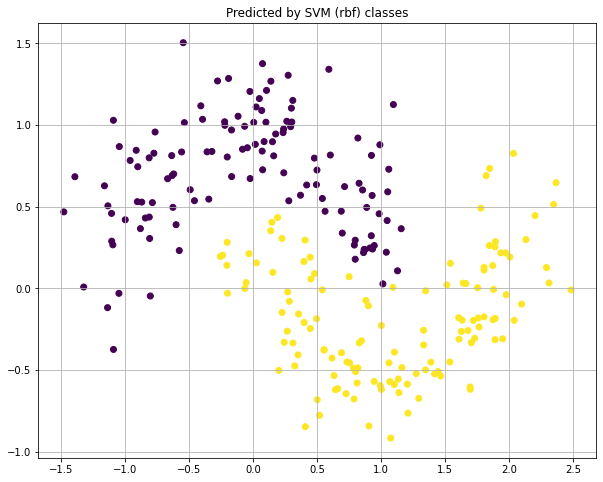

In [10]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
plot_decisions(X_test, svm, 'SVM (rbf)')

Accuracy score for SVM (sigmoid) is 0.624


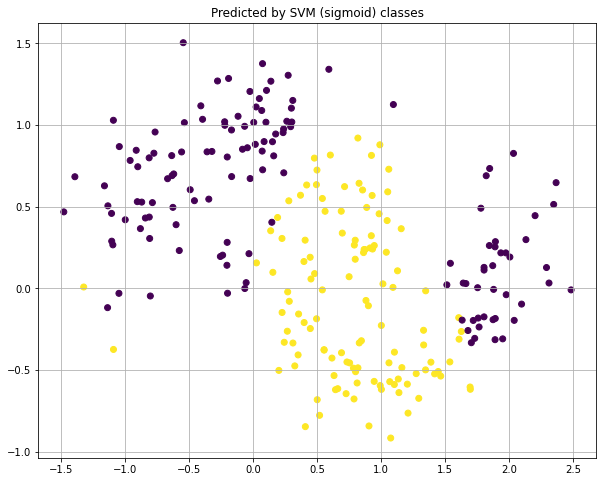

In [11]:
svm = SVC(kernel='sigmoid')
svm.fit(X_train, y_train)
plot_decisions(X_test, svm, 'SVM (sigmoid)')

__Вывод__:
1) некоторые подходы могут показать еще более плохой результат, чем линейный подход (например, kernel=sigmoid или kernel=poly c degree=4) \\
2) На построенных графиках видим, что теперь четкой разделяющей прямой (линейной функции) уже не наблюдается, что хорошо \\
2) наилучший результат дает rbf

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Accuracy score for logistic regression (with poly) is 0.98


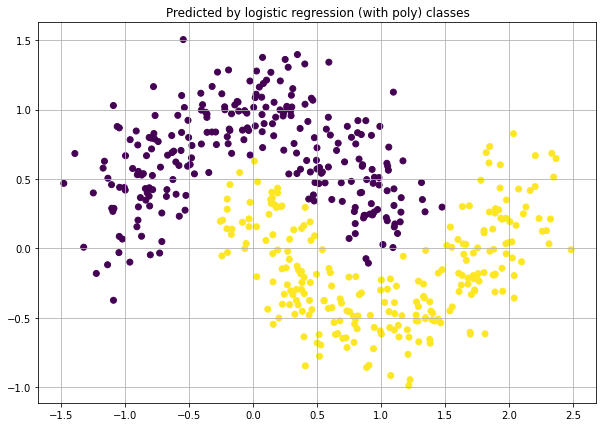

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
data_with_poly = poly.fit_transform(moons_points)

lr = LogisticRegression(penalty='l2', C=15, tol=1e-3)
lr.fit(data_with_poly, moons_labels)
y_pred = lr.predict(data_with_poly)
print('Accuracy score for {} is'.format('logistic regression (with poly)'), accuracy_score(moons_labels, y_pred))
plt.figure(figsize=(10, 7))
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=y_pred)
plt.title('Predicted by {} classes'.format('logistic regression (with poly)'))
plt.grid()
plt.show()

__Вывод__: получили отличный результат, взяв ту же степень полинома, которая оказалась оптимальной в предыдущем пункте.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

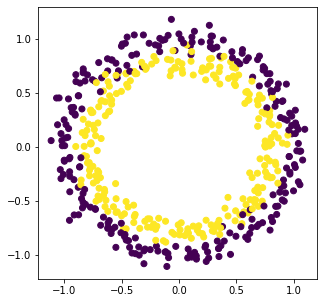

In [13]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

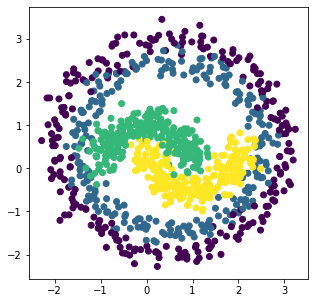

In [14]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Accuracy score for logistic regression is 0.396


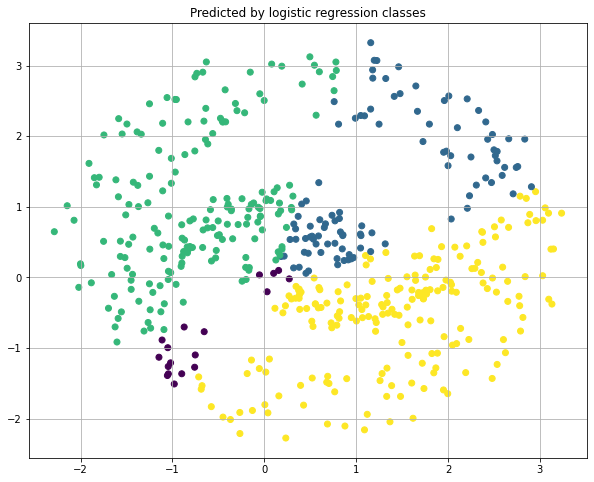

In [15]:
# Логистическая регрессия 
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.5)
lr = LogisticRegression(penalty='l2', C=15, multi_class='multinomial', tol=1e-3)
lr.fit(X_train, y_train)
plot_decisions(X_test, lr, "logistic regression")

__Вывод__: получили очень плохой результат :( Логистическая регрессия совсем не подходит.

Accuracy score for logistic regression (with poly) is 0.934


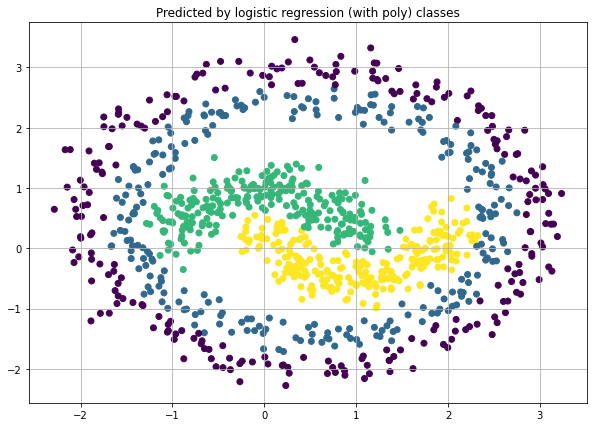

In [21]:
# Попробуем добавить polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
data_with_poly = poly.fit_transform(points)

lr = LogisticRegression(penalty='l2', multi_class='multinomial', C=100, tol=1e-3)
lr.fit(data_with_poly, labels)
y_pred = lr.predict(data_with_poly)
print('Accuracy score for {} is'.format('logistic regression (with poly)'), accuracy_score(labels, y_pred))
plt.figure(figsize=(10, 7))
plt.scatter(points[:, 0], points[:, 1], c=y_pred)
plt.title('Predicted by {} classes'.format('logistic regression (with poly)'))
plt.grid()
plt.show()

__Вывод__: результат намного лучше!

Accuracy score for SVM (rbf) is 0.908


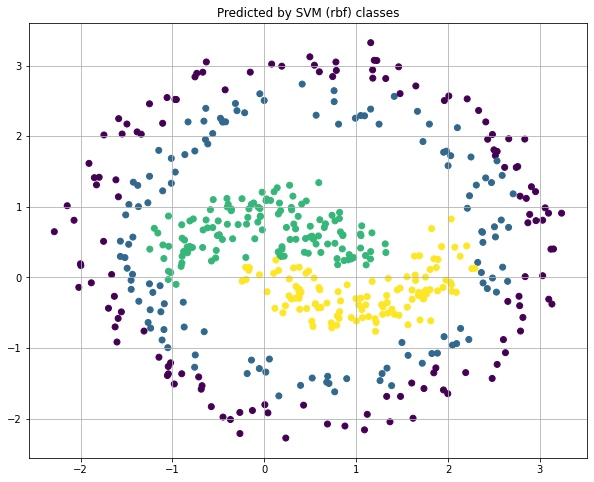

In [22]:
# Попробуем SVC с rbf
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
plot_decisions(X_test, svm, 'SVM (rbf)')

__Вывод__: результат чуть хуже, чем у логистической регрессии с применением polynomial features, однако это объясняется тем, что сейчас мы использовали не полную выборку для обучения, а лишь ее часть.